# Supervised Learning with scikit-learn

In [160]:
# Import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Importing the course datasets 
diabetes = pd.read_csv('datasets/diabetes_clean.csv')
music = pd.read_csv('datasets/music_clean.csv')
advertising = pd.read_csv('datasets/advertising_and_sales_clean.csv')
telecom = pd.read_csv("datasets/telecom_churn_clean.csv")

sales_df = advertising.loc[:,['tv','radio','social_media','sales']]
diabetes_df = diabetes

# Chapter 1 : Classification
## Classification

1. Build a Model
2. Model learns from the labeled data we pass to it
3. Pass unlabeled data to the model as input
4. Model predicts the labels of the unseen data

Note: `Labeled data = training data`

## k-Nearest Neighbors

* Predict the label of a data point by
    * Looking at the `k` closest labeled data points
    * Taking a majority vote

<img src="k-nn.png" 
     width="400" 
     height="500">

## KNN Intuition
<br></br>
<img src="k-nn-intuition.png" >


## k-Nearest Neighbors: Fit

In [42]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the target variable
y = telecom["churn"].values
X = telecom[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)
print(knn)

KNeighborsClassifier(n_neighbors=6)


## k-Nearest Neighbors: Predict

In [12]:
# Set of new data points:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

In [13]:
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


## Train/test split + computing accuracy
* In classification, accuracy is a commonly used metric
* <b>Accuracy:</b>
<img src="Train-Test-Split.png" 
     width="400" 
     height="500">

## Computing accuracy
<img src="Computing-accuracy.png">

## Model complexity
<img src="Model-complexity.png">


In [13]:
# Import the module
from sklearn.model_selection import train_test_split

X = telecom.drop("churn", axis=1).values
y = telecom["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


## Overfitting and underfitting

In [43]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


## Visualizing model complexity

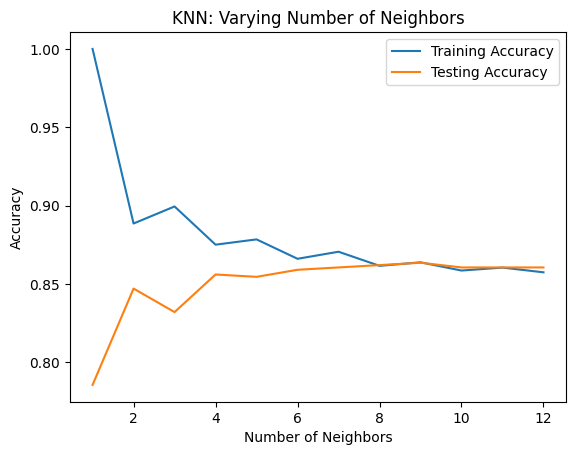

In [44]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

training accuracy decreases and test accuracy increases as the number of neighbors gets larger.

# Chapter 2 : Regression

## Creating features

In [14]:
import numpy as np

# Create X from the radio column's values
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X into a two-dimensional NumPy array.
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


## Building a linear regression model

In [15]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


## Visualizing a linear regression model

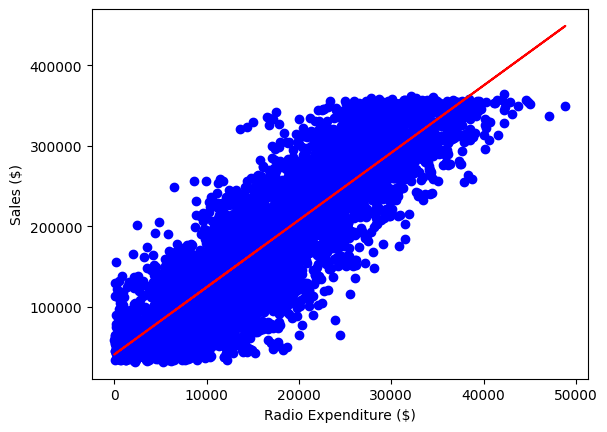

In [16]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="b")

# Create line plot
plt.plot(X, predictions, color="r")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

## Regression mechanics
$$y = ax + b$$

* Simple linear regression uses one feature
    * y = target
    * x = single feature
    * a,b = parameters/coefficients of the model - slope, intercept
* How do we choose a and b?
    * Define an error function for any given line
    * Choose the line that minimizes the error function
* Error function = loss function = cost function

## Ordinary Least Squares
<img src="OLS.png">

## Linear regression in higher dimensions
$$y = a_1x_1 + a_2x_2 + b$$

* To fit a linear regression model here:
    * Need to specify 3 variables: a1, a2, b
* In higher dimensions:
    * Known as multiple regression
    * Must specify coefficients for each feature and the variable b
$$y = a_1x_1 + a_2x_2 + a_3x_3 + ... + a_nx_n + b$$
* scikit-learn works exactly the same way:
    * Pass two arrays: features and target

## R-squared
$R^2$: quantifies the variance in target values explained by the features
* Values range from 0 to 1
High $R^2$:
<img src="High-R-Squared.png" width="300" height="300">
Low $R^2$:
<img src="Low-R-Squared.png" width="300" height="300">

## Mean squared error and root mean squared error
$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$
* MSE is measured in target units, squared

$RMSE = \sqrt{MSE}$
* Measure $RMSE$ in the same units at the target variable

## Fit and predict for regression

In [16]:
# Create X and y arrays
sales_df = advertising.loc[:,['tv','radio','social_media','sales']]
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


## Regression performance

In [24]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001006


the features explain 99.9% of the variance in sales values! Looks like this company's advertising strategy is working well!

## Cross-validation motivation
* model performance is dependent on the way we split up the data
* not representative of the model's ability to generalize to unseen data
* Solution: <b>Cross-validation!</b>

## Cross-validation basics
<img src="Cross-validation.png">

## Cross validation model performance
* 5 folds = 5-fold CV
* 10 folds = 10-fold CV
* k folds = k-fold CV
* more folds = More computationally expensive

## Cross-validation for R-squared

In [15]:
# Preapare data
sales_df = advertising.loc[:,['tv','radio','social_media','sales']]
X = sales_df.drop("sales", axis=1).values
X = np.delete(X, 0, 1)
print(X)

[[ 6566.23  2907.98]
 [ 9237.76  2409.57]
 [15886.45  2913.41]
 ...
 [19800.07  5096.19]
 [17534.64  1940.87]
 [15966.69  5046.55]]


In [9]:
# Import the necessary modules
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.74451678 0.77241887 0.76842114 0.7410406  0.75170022 0.74406484]


Notice how R-squared for each fold ranged between 0.74 and 0.77? By using cross-validation, we can see how performance varies depending on how the data is split!

## Analyzing cross-validation metrics

In [40]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.7536937414361207
0.012305389070474737
[0.74141863 0.77191916]


## Regularized regression
* Recall: Linear regression minimizes a loss function
* It chooses a coefficient, $a$, for each feature variable, plus $b$
* Large coeifficients can lead to overfitting
* Regularization: Penalize large coefficients

## Ridge regression
* Loss function = OLS loss function + $\alpha * \sum_{i=1}^{n} a_i^2$
* Ridge penalizes large positive or negative coefficients
* $\alpha$: parameter we need to choose
* Picking $\alpha$ is similar to picking `k` in KNN
* Hyperparameter: variable used to optimize model parameters
* $\alpha$ controls model complexity
    * $\alpha$ = 0 = OLS (Can lead to overfitting)
    * Very high $\alpha$: Can lead to underfitting

## Lasso regression for feature selection
* Loss function = OLS loss function + $\alpha * \sum_{i=1}^{n} |a_i|$
* Lasso can select important features of a dataset
* Shrinks the coefficients of less important features to zero
* Features not shrunk to zero are selected by lasso

## Regularized regression: Ridge
Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In [10]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even by heavily penalizing large coefficients, underfitting does not occur!

## Lasso regression for feature importance

In [12]:
print(sales_df)

           tv     radio  social_media      sales
0     16000.0   6566.23       2907.98   54732.76
1     13000.0   9237.76       2409.57   46677.90
2     41000.0  15886.45       2913.41  150177.83
3     83000.0  30020.03       6922.30  298246.34
4     15000.0   8437.41       1406.00   56594.18
...       ...       ...           ...        ...
4541  26000.0   4472.36        717.09   94685.87
4542  71000.0  20610.69       6545.57  249101.92
4543  44000.0  19800.07       5096.19  163631.46
4544  71000.0  17534.64       1940.87  253610.41
4545  42000.0  15966.69       5046.55  148202.41

[4546 rows x 4 columns]


In [17]:
sales_df = advertising.loc[:,['tv','radio','social_media','sales']]
sales_columns = sales_df.drop("sales", axis=1).columns

[ 3.56256962 -0.00397035  0.00496385]


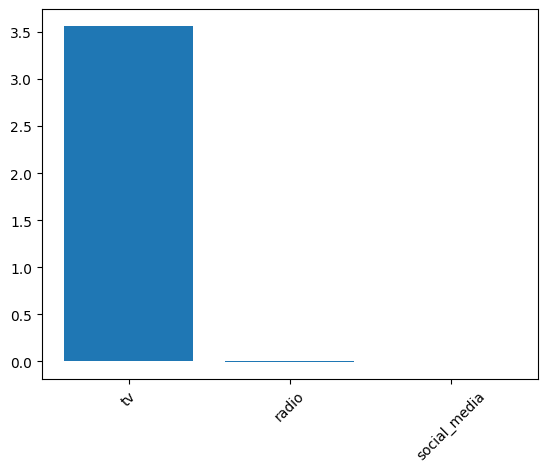

In [18]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

See how the figure makes it clear that expenditure on TV advertising is the most important feature in the dataset to predict sales values!

# Chapter 3 : Fine-Tuning Model

## Class imbalance
* Classification for predicting fraudulent bank transactions
    * 99% of transactions are legitimate: 1% are fraudulent
* Could build a classifier that predicts NONE of the transactions are fraudulent
    * 99% accurate!
    * But terrible at actually predicting fraudulent transactions
    * Fails at its original purpose
* Class imbalance: Uneven frequency of classes
* Need a different way to assess performance

## Assessing classification performance
## Accuracy
<p align="center">
    <img src="Accuracy.png" width="300" height="250">
</p>
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

## Precision
<p align="center">
<img src="Precision.png" width="300" height="250">
$$Precision = \frac{TP}{TP + FP}$$
</p>

* High precision = lower false positive rate
* High precision: Not many legitimate transactions are predicted to be fraudulent

## Recall
<p align="center">
<img src="Recall.png" width="300" height="250">
$$Recall = \frac{TP}{TP + FN}$$
</p>

* High recall = lower false negative rate
* High recall: Predicted most fraudulent transactions correctly

## F1 Score
$$F1\ Score = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$


## Deciding on a primary metric
With three different classification problems, and your task is to select the problem where <b>precision</b> is best suited as the primary metric.
1. A model predicting the presence of cancer as the positive class.
    `Incorrect,
    This model should minimize the number of false negatives, so recall is a more appropriate metric.`
2. A classifier predicting the positive class of a computer program containing malware.
    `Incorrect,
    To avoid installing malware, false negatives should be minimized, hence recall or F1-score are better metrics for   this model.`
3. <b>A model predicting if a customer is a high-value lead for a sales team with limited capacity.</b>
    `Correct! With limited capacity, the sales team needs the model to return the highest proportion of true positives compared to all predicted positives, thus minimizing wasted effort.`

## Assessing a diabetes prediction classifier

In [25]:
# Prepare data
diabetes_df = diabetes
X = diabetes_df.loc[:,['bmi','age']].values
y = diabetes_df['diabetes'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, stratify=y)

In [26]:
# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[121  29]
 [ 56  25]]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       150
           1       0.46      0.31      0.37        81

    accuracy                           0.63       231
   macro avg       0.57      0.56      0.56       231
weighted avg       0.61      0.63      0.61       231



The model produced 25 true positives and 29 false positives, meaning precision was less than 50%, which is confirmed in the classification report. The output also shows a better F1-score for the zero class, which represents individuals who do not have diabetes.

## Logistic regression for binary classification
* Logistic regression is used for classification problems
* Logistic regression outputs probabilities
* If the probability, $p$ > 0.5:
    * The data is labeled `1`
* If the probability, $p$ < 0.5:
    * The data is labeled `0`

## Linear decision boundary
<img src="Linear-Boundary.png">

## Probability thresholds
* By default, logistic regression threshold = 0.5
* Not specific to logistic regression
    * KNN classifiers also have thresholds
* What happens if we vary the threshold?

## ROC curve
<img src="ROC.png">


## Building a logistic regression model

In [29]:
# Prepare data
diabetes_df = diabetes
X = diabetes_df.drop(columns=['diabetes']).values
y = diabetes_df['diabetes'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [30]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.23040852 0.28910622 0.73169399 0.63125227 0.4511525  0.07690538
 0.73115031 0.1243289  0.04388881 0.3482686 ]


Notice how the probability of a diabetes diagnosis for the first 10 individuals in the test set ranges from 0.04 to 0.76. Now let's plot the ROC curve to visualize performance using different thresholds.



## The ROC curve

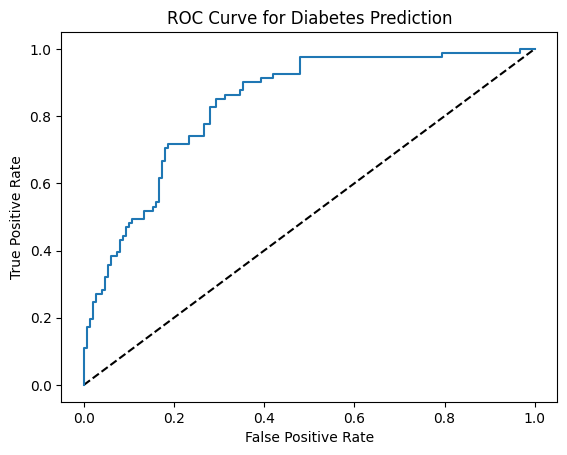

In [22]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

## ROC AUC (area under the ROC curve)

In [31]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.8360493827160493
[[115  35]
 [ 62  19]]
              precision    recall  f1-score   support

           0       0.65      0.77      0.70       150
           1       0.35      0.23      0.28        81

    accuracy                           0.58       231
   macro avg       0.50      0.50      0.49       231
weighted avg       0.55      0.58      0.56       231



## Hyperparameter tuning
* Ridge/lasso regression: `Choosing alpha`
* KNN: Choosing `n_neighbors`
* Hyperparameters: Parameters we specify before fitting the model
    * Like `alpha` and `n_neighbors`

## Choosing the correct hyperparameters
1. Try lots of different hyperparameter values
2. Fit all of them separately
3. See how well they perform
4. Choose the best performing values

* This is called <b>hyperparameter tuning</b>
* It is essential to use cross-validation to avoid overfitting to the test set
* We can still split the data and perform cross-validation on the training set
* We withhold the test set for final evaluation

## Grid search cross-validation
<img src="Grid-search.png">

## Limitations and an alternative approach
* 3-fold cross-validation, 1 hyperparameter, 10 total values = 30 fits
* 10-fold cross-validation, 3 hyperparameter, 30 total values = 900 fits
* another way is `RandomizedSearchCV`

## Hyperparameter tuning with GridSearchCV

In [162]:
# Prepare data
diabetes_df = diabetes
X = diabetes_df.drop(columns=['glucose']).values
y = diabetes_df['glucose'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso = Lasso()
kf = KFold(n_splits=5, random_state=42, shuffle=True)

array([[ 2.   ,  0.   ,  0.   , ...,  0.304, 21.   ,  0.   ],
       [ 9.   , 82.   , 24.   , ...,  1.282, 50.   ,  1.   ],
       [ 1.   , 46.   , 19.   , ...,  0.654, 22.   ,  0.   ],
       ...,
       [10.   , 86.   , 37.   , ...,  1.136, 38.   ,  1.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.205, 29.   ,  1.   ],
       [ 0.   , 96.   ,  0.   , ...,  0.262, 21.   ,  0.   ]])

In [153]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.3307880723812198


Unfortunately, the best model only has an R-squared score of `0.33`, highlighting that using the optimal hyperparameters does not guarantee a high performing model!

## Hyperparameter tuning with RandomizedSearchCV
`GridSearchCV` can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use `RandomizedSearchCV`, which tests a fixed number of hyperparameter settings from specified probability distributions.

In [171]:
# Prepare data
diabetes_df = diabetes
X = diabetes_df.drop(columns=['diabetes']).values
y = diabetes_df['diabetes'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
logreg = LogisticRegression()
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [183]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.18375510204081633, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.926530612244898}
Tuned Logistic Regression Best Accuracy Score: 0.7345861655337865


In [158]:
print(X_train)

[[ 2.     0.     0.    ...  0.304 21.     0.   ]
 [ 9.    82.    24.    ...  1.282 50.     1.   ]
 [ 1.    46.    19.    ...  0.654 22.     0.   ]
 ...
 [10.    86.    37.    ...  1.136 38.     1.   ]
 [ 0.     0.     0.    ...  0.205 29.     1.   ]
 [ 0.    96.     0.    ...  0.262 21.     0.   ]]


Great searching! Even without exhaustively trying every combination of hyperparameters, the model has an accuracy of over 70% on the test set! So far we have worked with clean datasets; however, in the next chapter, we will discuss the steps required to transform messy data before building supervised learning models.

# Chapter 4 : Preprocessing and Pipelines